## FBA simulation E.coli
Simulating the FBA part of the E.coli model with `cobrapy`. Implements checks that
* model is simulating
* gene deletions
* uniqueness of solutions
* drive the model via exchange reactions

This requires
* `cobrapy >= 0.6.0a3`

In [1]:
from __future__ import print_function, absolute_import

import pandas as pd
import cobra
from matplotlib import pyplot as plt

from sbmlutils import fbc
from sbmlutils.dfba.analysis import set_matplotlib_parameters
from sbmlutils.dfba.ecoli import model_factory

set_matplotlib_parameters()

/usr/local/lib/python2.7/dist-packages/optlang/gurobi_interface.py:26: UserWarning: Be careful! The GUROBI interface is still under construction ...
  warn("Be careful! The GUROBI interface is still under construction ...")
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# load model
sbml_path = './results/v{}/ecoli_fba.xml'.format(model_factory.version)
print(sbml_path)
model = cobra.io.read_sbml_model(sbml_path)
cobra.io.sbml3.validate_sbml_model(sbml_path)

./results/v2/ecoli_fba.xml


(<Model ecoli_fba at 0x7fdbbd1ae250>,
 {'SBML errors': [], 'other': [], 'validator': [], 'warnings': []})

In [3]:
# objective function & boundaries
# pprint(mfba.objective)
df = fbc.cobra_reaction_info(model)
print(df.head())
print("reactions:", len(model.reactions))
print("metabolites:", len(model.metabolites))
print("genes:", len(model.genes))


          lb    ub reversibility boundary objective_coefficient  \
ACALD  -1000  1000          True    False                     0   
ACALDt -1000  1000          True    False                     0   
ACKr   -1000  1000          True    False                     0   
ACONTa -1000  1000          True    False                     0   
ACONTb -1000  1000          True    False                     0   

             forward_variable                     reverse_variable  
ACALD    0 <= ACALD <= 1000.0   0 <= ACALD_reverse_fda2b <= 1000.0  
ACALDt  0 <= ACALDt <= 1000.0  0 <= ACALDt_reverse_858fa <= 1000.0  
ACKr      0 <= ACKr <= 1000.0    0 <= ACKr_reverse_b49c0 <= 1000.0  
ACONTa  0 <= ACONTa <= 1000.0  0 <= ACONTa_reverse_cad6d <= 1000.0  
ACONTb  0 <= ACONTb <= 1000.0  0 <= ACONTb_reverse_e198a <= 1000.0  
reactions: 95
metabolites: 72
genes: 137


In [4]:
# Exchange reactions
ex_idx = df.index.str.contains('^EX_')
df[ex_idx]

,lb,ub,reversibility,boundary,objective_coefficient,forward_variable,reverse_variable
EX_ac_e,0,1000,False,True,0,0.0 <= EX_ac_e <= 1000.0,0 <= EX_ac_e_reverse_0be96 <= 0
EX_acald_e,0,1000,False,True,0,0.0 <= EX_acald_e <= 1000.0,0 <= EX_acald_e_reverse_c096e <= 0
EX_akg_e,0,1000,False,True,0,0.0 <= EX_akg_e <= 1000.0,0 <= EX_akg_e_reverse_70d85 <= 0
EX_co2_e,-1000,1000,True,True,0,0 <= EX_co2_e <= 1000.0,0 <= EX_co2_e_reverse_d0466 <= 1000.0
EX_etoh_e,0,1000,False,True,0,0.0 <= EX_etoh_e <= 1000.0,0 <= EX_etoh_e_reverse_cc64f <= 0
EX_for_e,0,1000,False,True,0,0.0 <= EX_for_e <= 1000.0,0 <= EX_for_e_reverse_23269 <= 0
EX_fru_e,0,1000,False,True,0,0.0 <= EX_fru_e <= 1000.0,0 <= EX_fru_e_reverse_c3828 <= 0
EX_fum_e,0,1000,False,True,0,0.0 <= EX_fum_e <= 1000.0,0 <= EX_fum_e_reverse_e3432 <= 0
EX_glc__D_e,-10,1000,True,True,0,0 <= EX_glc__D_e <= 1000.0,0 <= EX_glc__D_e_reverse_af641 <= 10.0
EX_gln__L_e,0,1000,False,True,0,0.0 <= EX_gln__L_e <= 1000.0,0 <= EX_gln__L_e_reverse_6a1a1 <= 0


In [5]:
# optimize
s = model.optimize(objective_sense="maximize")
model.summary(fva=True)

IN FLUXES                       OUT FLUXES                   OBJECTIVES
------------------------------  ---------------------------  ----------------------
id          Flux  Range         id       Flux  Range         BIOMASS_Ecol...  0.874
--------  ------  ------------  -----  ------  ------------
o2_e       21.8   [21.8, 21.8]  h2o_e    29.2  [29.2, 29.2]
glc__D_e   10     [10, 10]      co2_e    22.8  [22.8, 22.8]
nh4_e       4.77  [4.77, 4.77]  h_e      17.5  [17.5, 17.5]
pi_e        3.21  [3.21, 3.21]


In [6]:
# pfba (minimal flux)
# no difference, the flux variability analysis 
# already showed us that the model has unique solution under given bounds 
s = model.optimize(objective_sense="maximize")
cobra.flux_analysis.pfba(model)
model.summary(fva=True)

IN FLUXES                       OUT FLUXES                   OBJECTIVES
------------------------------  ---------------------------  ----------------------
id          Flux  Range         id       Flux  Range         BIOMASS_Ecol...  0.874
--------  ------  ------------  -----  ------  ------------
o2_e       21.8   [21.8, 21.8]  h2o_e    29.2  [29.2, 29.2]
glc__D_e   10     [10, 10]      co2_e    22.8  [22.8, 22.8]
nh4_e       4.77  [4.77, 4.77]  h_e      17.5  [17.5, 17.5]
pi_e        3.21  [3.21, 3.21]


Network map:  
https://escher.github.io/builder/index.html?enable_editing=true&map_name=e_coli_core.Core%20metabolism

In [7]:
# what happens to glucose ?
# single reaction to 
print(model.metabolites.glc__D_e.summary())

PRODUCING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ----------------------------------
100%      10  EX_glc_...  glc__D_e <=>

CONSUMING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ----------------------------------
100%      10  GLCpts      glc__D_e + pep_c --> g6p_c + pyr_c
None


In [8]:
# gene and reaction deletions
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
# single_gene_deletion(model)
import numpy as np
r_del = single_reaction_deletion(model)
r_del['percent'] = np.round(r_del['flux']/0.874, 3)
r_del.sort_values(by=['flux'])

,flux,status,percent
PGM,-1.053358e-13,optimal,-0.000
EX_pi_e,-2.705816e-14,optimal,-0.000
RPI,-2.592923e-14,optimal,-0.000
GAPD,-1.189110e-15,optimal,-0.000
NH4t,-7.106052e-16,optimal,-0.000
ICDHyr,-1.670071e-17,optimal,-0.000
GLNS,-6.389754e-29,optimal,-0.000
EX_glc__D_e,0.000000e+00,infeasible,0.000
GLCpts,0.000000e+00,infeasible,0.000
BIOMASS_Ecoli_core_w_GAM,0.000000e+00,optimal,0.000


## Change the bounds
Driving the model via changing the bounds of the exchange reactions
* in coupling based on maximal uptake rates and availability of substrate

In [9]:
import numpy as np
import pandas as pd

# set of bounds (we can't go to zero, a minimal amount of glc is needed for biomass generation)
# More complete models could switch to alternative carbon sources
glc_bounds = np.linspace(-10, -0.5, 10)

results = []
for lb_glc in glc_bounds:
    # set the lower bound (uptake direction) of the exchange reaction
    print(lb_glc)
    model.reactions.get_by_id("EX_glc__D_e").lower_bound = lb_glc
    # pFBA
    s = model.optimize(objective_sense="maximize")
    s = cobra.flux_analysis.pfba(model)
    model.summary(fva=True)
    
    fluxes = s.fluxes
    results.append(fluxes)
df = pd.DataFrame(results)

-10.0
IN FLUXES                       OUT FLUXES                   OBJECTIVES
------------------------------  ---------------------------  ----------------------
id          Flux  Range         id       Flux  Range         BIOMASS_Ecol...  0.874
--------  ------  ------------  -----  ------  ------------
o2_e       21.8   [21.8, 21.8]  h2o_e    29.2  [29.2, 29.2]
glc__D_e   10     [10, 10]      co2_e    22.8  [22.8, 22.8]
nh4_e       4.77  [4.77, 4.77]  h_e      17.5  [17.5, 17.5]
pi_e        3.21  [3.21, 3.21]
-8.94444444444
IN FLUXES                       OUT FLUXES                   OBJECTIVES
------------------------------  ---------------------------  ----------------------
id          Flux  Range         id       Flux  Range         BIOMASS_Ecol...  0.777
--------  ------  ------------  -----  ------  ------------
o2_e       19.7   [19.7, 19.7]  h2o_e    26.3  [26.3, 26.3]
glc__D_e    8.94  [8.94, 8.94]  co2_e    20.6  [20.6, 20.6]
nh4_e       4.24  [4.24, 4.24]  h_e      15.6  [

In [10]:
# Find Exchange reactions & Internal Reactions
ex_rids = []
in_rids = []
for r in model.reactions:
    rid = r.id
    if (rid.startswith('EX_')):
        ex_rids.append(rid)
    else:
        in_rids.append(rid)
        
# print(ex_rids)
# print()
# print(in_rids)

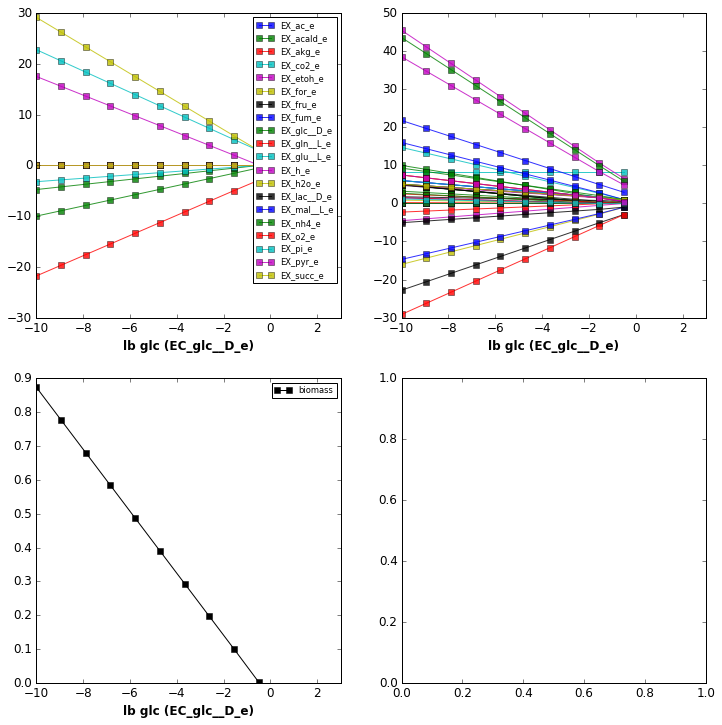

In [11]:
# Plot internal, external, and biomass reactions
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for rid in ex_rids:
    ax1.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

for rid in in_rids:
    ax2.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

ax3.plot(glc_bounds, df["BIOMASS_Ecoli_core_w_GAM"], color="black", label="biomass",
        marker="s")
    
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('lb glc (EC_glc__D_e)')
    ax.set_xlim(-10,3)

ax1.legend()
ax3.legend()

plt.show()
fig.savefig("ecoli_glc_dependency.png", bbox="tight")